In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [20]:
def kernel(point,xmat, k):
    m,n = np.shape(xmat)
    weights = np.mat(np.eye((m))) # eye - identity matrix
    for j in range(m):
        diff = point - X[j]
        weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
    return weights

def localWeight(point,xmat,ymat,k):
    wei = kernel(point,xmat,k)
    W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T))
    return W

def localWeightRegression(xmat,ymat,k):
    m,n = np.shape(xmat)
    ypred = np.zeros(m)
    for i in range(m):
        ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k)
    return ypred
    
def graphPlot(X,ypred):
    sortindex = X[:,1].argsort(0) #argsort - index of the smallest
    # print(sortindex)
    xsort = X[sortindex][:,0]
    # print(xsort)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(bill,tip, color='green')
    ax.plot(xsort[:,1],ypred[sortindex], color = 'red', linewidth=5)
    plt.xlabel('Total bill')
    plt.ylabel('Tip')
    plt.show()

[ 2.89600072  1.79792676  3.4522923   3.52469879  3.55735533  4.30366513
  1.74542033  3.3728316   2.44785581  2.48880782  1.8083104   4.79767983
  2.4062242   2.96892092  2.48153633  3.60296925  1.79915825  2.69663122
  2.89434019  3.31271154  2.99001488  3.16455055  2.45092913  5.81565108
  3.01841158  2.97028536  2.25892138  2.0276448   3.60793899  2.97252695
  1.95484881  2.99194322  2.44464168  3.32920123  2.96499951  3.21755765
  2.7072132   2.89066608  2.88520305  4.24629839  2.56138533  2.92431206
  2.4541946   1.95650777  3.76134349  3.00455741  3.53901817  4.09179973
  3.66290968  3.00808646  2.0045738   1.80493014  4.74741353  1.89792722
  4.27129464  2.93423809  3.43543432  3.4808215   1.94126954  7.23057352
  3.16455055  2.41735695  1.88491665  3.00455741  2.93692617  3.09292596
  2.77475539  1.          3.14256163  2.45273299  2.00874844  2.90170782
  3.36328249  4.29987815  2.49550941  1.79043042  2.99001488  3.59729086
  3.57479198  2.91358841  2.92392492  2.84629776  1

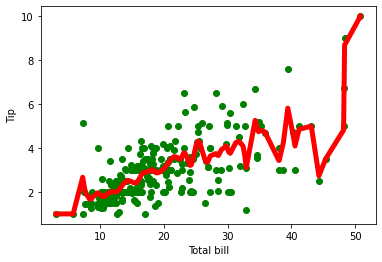

In [23]:
# load data points
data = pd.read_csv('./data10.csv')
bill = np.array(data.total_bill) # We use only Bill amount and Tips data
tip = np.array(data.tip)
mbill = np.mat(bill) # .mat will convert nd array is converted in 2D array
mtip = np.mat(tip)
m= np.shape(mbill)[1]
one = np.mat(np.ones(m))
X = np.hstack((one.T,mbill.T)) # 244 rows, 2 cols
ypred = localWeightRegression(X,mtip,0.5) # increase k to get smooth curves
print(ypred)
print(type(ypred))
print(ypred.shape)
graphPlot(X,ypred)